# LIbrary import

In [1]:
#This is a test

Mounted at /content/drive


In [ ]:
!pip install pmdarima
!pip install statsmodels==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 14.4 MB/s 
     |████████████████████████████████| 9.8 MB 73.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.7 MB 14.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 2.0.1 requires statsmodels>=0.13.2, but you have statsmodels 0.11.0 which is incompatible.
plo

In [ ]:
from sklearn import metrics
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
import statsmodels.api as sm
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

# Data import

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Kellogg/train_challenge.csv", parse_dates = ['fisc_yr_pd'])
data.head()

,channel,icbp_customer,fisc_yr_pd,bu,Sku,velocity,ea_cs,ea_gr,si_kg
0,MODERNO,CI,2017001,CEREAL,10012.0,B-Regular,24.0,299.995833,6119.960
1,MODERNO,CI,2017001,CEREAL,10015.0,A,21.0,490.009524,5103.984
2,MODERNO,CI,2017001,CEREAL,10018.0,A,55.5,839.989286,0.000
3,MODERNO,CI,2017001,CEREAL,10214.0,B-Regular,28.0,309.996429,7022.143
4,MODERNO,CI,2017001,CEREAL,10218.0,A,24.0,730.000000,164970.049


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20868 entries, 0 to 20867
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   channel        20868 non-null  object 
 1   icbp_customer  20868 non-null  object 
 2   fisc_yr_pd     20868 non-null  object 
 3   bu             20868 non-null  object 
 4   Sku            20868 non-null  float64
 5   velocity       20868 non-null  object 
 6   ea_cs          20858 non-null  float64
 7   ea_gr          20858 non-null  float64
 8   si_kg          20868 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


# Data cleaning

In [ ]:
data = data.dropna()

In [ ]:
data["date_string"] = data.fisc_yr_pd.astype(str)
data['year'] = data.date_string.str[:4]
data['month'] = data.date_string.str[-2:]
data["date_str"] = data["year"].astype(str) + data["month"].astype(str)
data['date'] = pd.to_datetime(data['date_str'], format='%Y%m')
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,channel,icbp_customer,fisc_yr_pd,bu,Sku,velocity,ea_cs,ea_gr,si_kg,date_string,year,month,date_str,date
0,MODERNO,CI,2017001,CEREAL,10012.0,B-Regular,24.0,299.995833,6119.960,2017001,2017,01,201701,2017-01-01
1,MODERNO,CI,2017001,CEREAL,10015.0,A,21.0,490.009524,5103.984,2017001,2017,01,201701,2017-01-01
2,MODERNO,CI,2017001,CEREAL,10018.0,A,55.5,839.989286,0.000,2017001,2017,01,201701,2017-01-01
3,MODERNO,CI,2017001,CEREAL,10214.0,B-Regular,28.0,309.996429,7022.143,2017001,2017,01,201701,2017-01-01
4,MODERNO,CI,2017001,CEREAL,10218.0,A,24.0,730.000000,164970.049,2017001,2017,01,201701,2017-01-01


In [ ]:
data.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   20858
unique                     60
top       2021-12-01 00:00:00
freq                      434
first     2017-01-01 00:00:00
last      2021-12-01 00:00:00
Name: date, dtype: object

In [ ]:
data.to_csv("clean_train_challengue.csv")

In [ ]:
data = data.set_index('date')
data.head()

,channel,icbp_customer,fisc_yr_pd,bu,Sku,velocity,ea_cs,ea_gr,si_kg,date_string,year,month,date_str
date,,,,,,,,,,,,,
2017-01-01,MODERNO,CI,2017001,CEREAL,10012.0,B-Regular,24.0,299.995833,6119.960,2017001,2017,01,201701
2017-01-01,MODERNO,CI,2017001,CEREAL,10015.0,A,21.0,490.009524,5103.984,2017001,2017,01,201701
2017-01-01,MODERNO,CI,2017001,CEREAL,10018.0,A,55.5,839.989286,0.000,2017001,2017,01,201701
2017-01-01,MODERNO,CI,2017001,CEREAL,10214.0,B-Regular,28.0,309.996429,7022.143,2017001,2017,01,201701
2017-01-01,MODERNO,CI,2017001,CEREAL,10218.0,A,24.0,730.000000,164970.049,2017001,2017,01,201701


In [ ]:
data.drop(["date_str", "month", "year", "date_string", "fisc_yr_pd"], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20858 entries, 2017-01-01 to 2021-12-01
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   channel        20858 non-null  object 
 1   icbp_customer  20858 non-null  object 
 2   bu             20858 non-null  object 
 3   Sku            20858 non-null  float64
 4   velocity       20858 non-null  object 
 5   ea_cs          20858 non-null  float64
 6   ea_gr          20858 non-null  float64
 7   si_kg          20858 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [ ]:
data = pd.get_dummies(data, columns = ["channel", "icbp_customer", "bu", "Sku", "velocity"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20858 entries, 2017-01-01 to 2021-12-01
Columns: 206 entries, ea_cs to velocity_X
dtypes: float64(3), uint8(203)
memory usage: 4.7 MB


# Time series

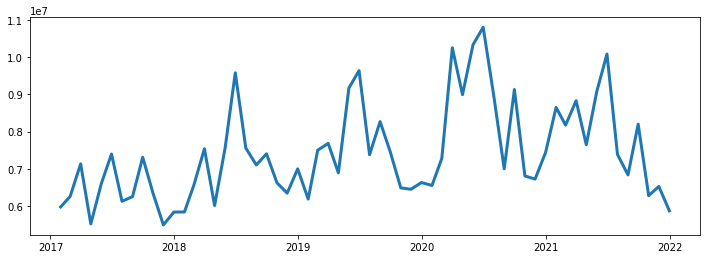

In [ ]:

monthly_df = pd.DataFrame()
monthly_df['si_kg'] = data['si_kg'].resample('M').sum()

#plot monthly kg data
plt.figure(figsize = (12,4))
plt.plot(monthly_df.index, monthly_df.si_kg, linewidth=3)


# Encontrar la diferenciación ideal (d value)
Para revisar si la serie es estacionaria o no utilizamos la *prueba Augumented Dickey Fuller*. Si la serie ya es estacionarioa entonces la diferenciación (d) es igual 0.

Si el valor *p* de la prueba es menor a 0.05 entonces se infiere que la serie de tiempo es de hecho estacionaria.

Si p-value > 0.05 entonces seguimos con la busqueda del orden de diferenciación.

In [ ]:
result = adfuller(data.si_kg)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.061702
p-value: 0.000000


El p-value es menor a 0.05, por lo tanto la serie de tiempo es estacionaria.

Veamos como se ve el autocorrelograma:

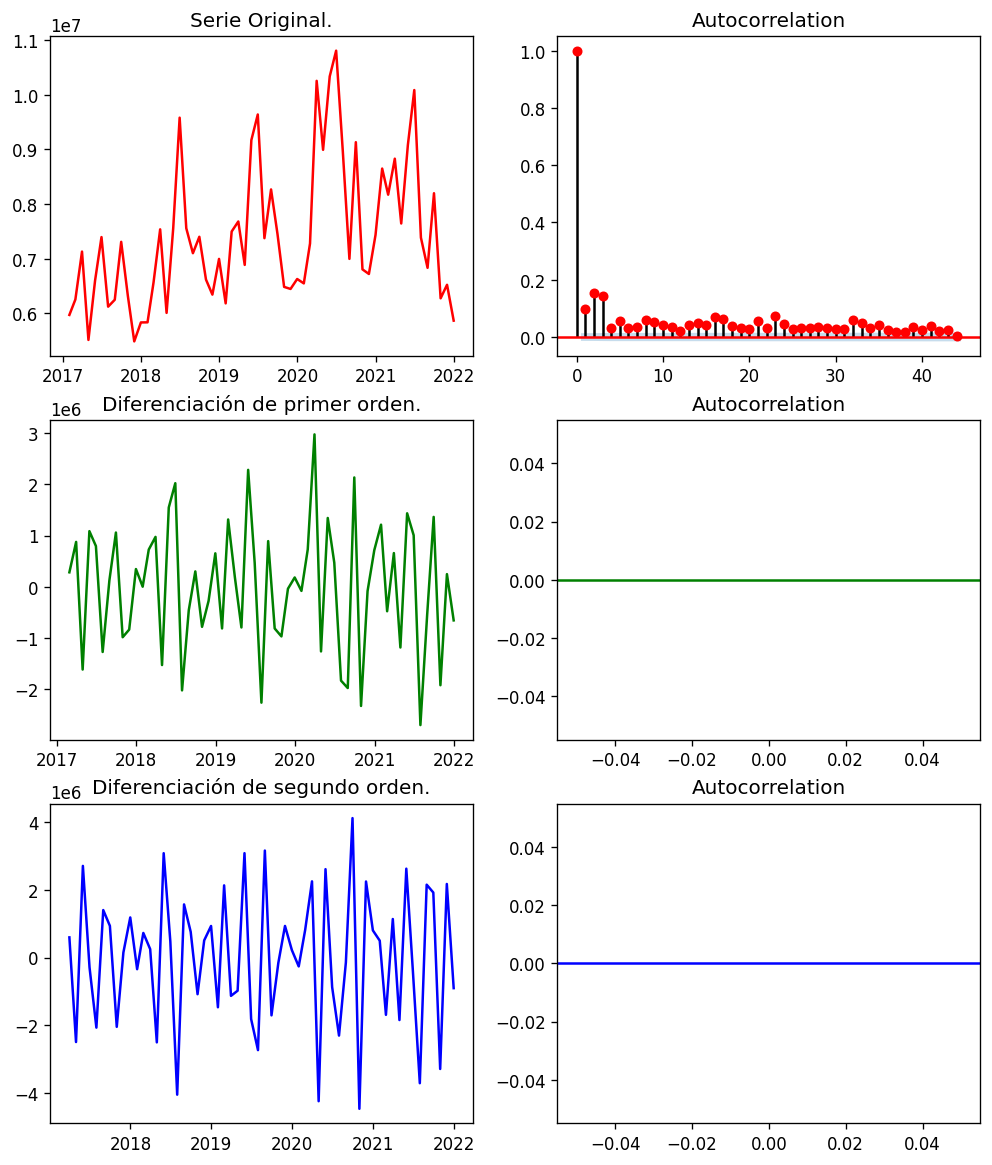

In [ ]:
plt.rcParams.update({'figure.figsize': (10,12), 'figure.dpi': 120})

monthly_df = pd.DataFrame()
monthly_df['si_kg'] = data['si_kg'].resample('M').sum()

#Serie original
fig, axes = plt.subplots(3, 2, sharex = False)
axes[0, 0].plot(monthly_df.si_kg, color = 'r'); axes[0, 0].set_title('Serie Original.')
plot_acf(data.si_kg, ax = axes[0, 1], color = 'r')

#Primera diferenciación
axes[1,0].plot(monthly_df.si_kg.diff(), color = 'g'); axes[1, 0].set_title('Diferenciación de primer orden.')
plot_acf(data.si_kg.diff(), ax = axes[1,1], color = 'g')

#Segunda diferenciación
axes[2,0].plot(monthly_df.si_kg.diff().diff(), color = 'b'); axes[2, 0].set_title("Diferenciación de segundo orden.")
plot_acf(data.si_kg.diff().diff(), ax = axes[2, 1], color = 'b')

plt.show()

Aplicando diferenciación podemos ver que el autocorrelation plot no nos muestra nada y la serie original si que nos da más información por lo que no hace falta diferenciar y *el valor será $d=0$.*

# Encontrar el orden del término AR (p)
Para encontrar el valor de p debemos de inspeccionar el gráfico de Autocorrelación parcial (PACF) que no es otra cosa que la correlación entre el retraso y la serie.

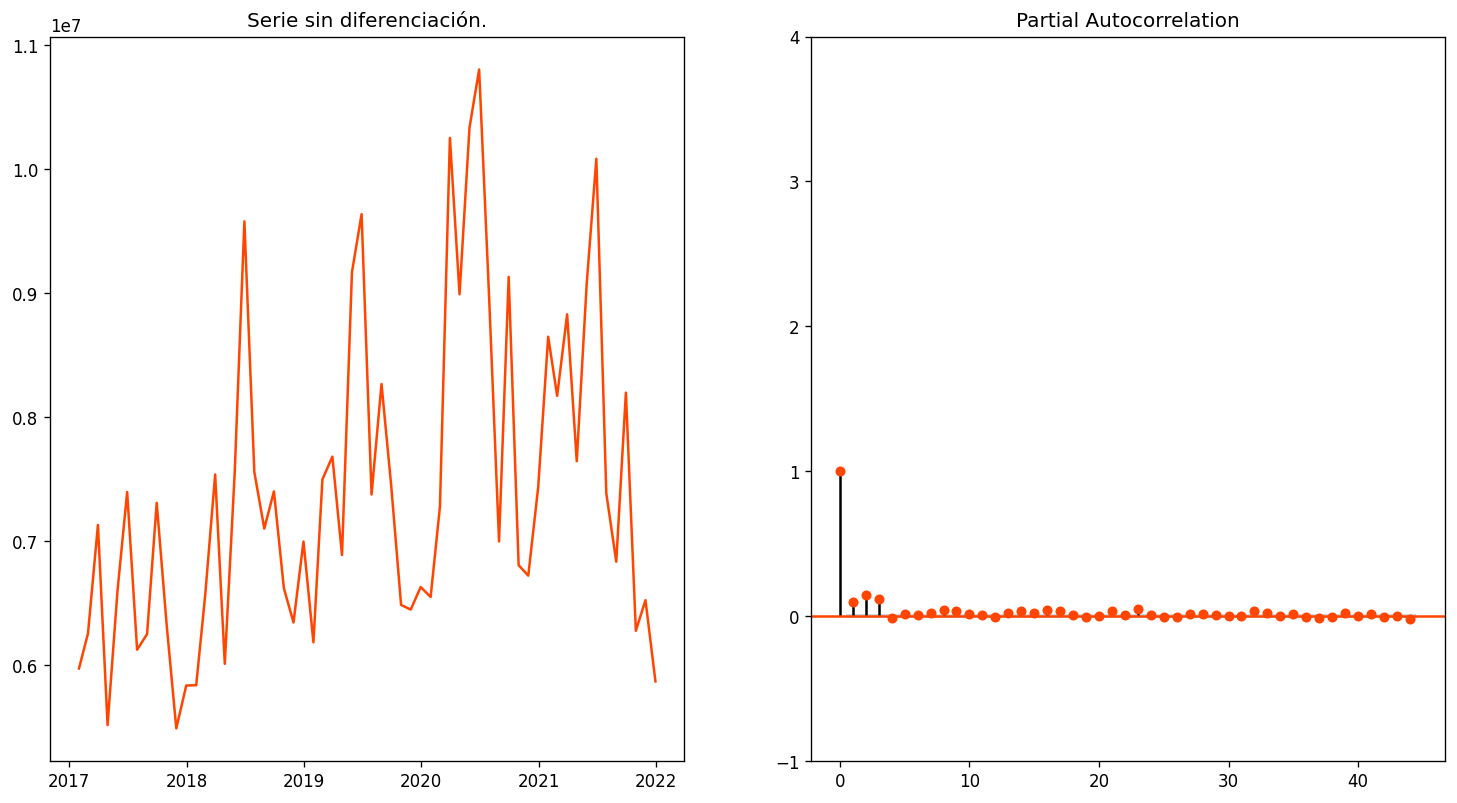

In [ ]:
 #PACF plot sin ninguna diferenciación en la serie.

monthly_df = pd.DataFrame()
monthly_df['si_kg'] = data['si_kg'].resample('M').sum()

plt.rcParams.update({'figure.figsize': (15,8), 'figure.dpi': 120})

fig, axes = plt.subplots(1, 2, sharex = False)
axes[0].plot(monthly_df.si_kg, color = "orangered"); axes[0].set_title("Serie sin diferenciación.")
axes[1].set(ylim = (-1,4))
plot_pacf(data.si_kg, ax = axes[1], color = "orangered")
plt.show()

De la gráfica de arriba tomamos el orden del termino AR como iagual a tantos rezagos cruzan el limidel de significacia en la gráfica PACF.

En este caso tenemos varios rezagos que pasan de la línea de importancia, pero nos quedaremos con 2 que el el más evidentes de todos. Por lo tanto para el  termino de AR *el valor será $p=2$.*

#Encontrar el orden del termino MA (q)
Para encontrar el valor de p debemos de inspeccionar el gráfico de ACF para el número de terminos de MA. Un término MA es técnicamente el error del pronostico retrasado.

El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionaria.

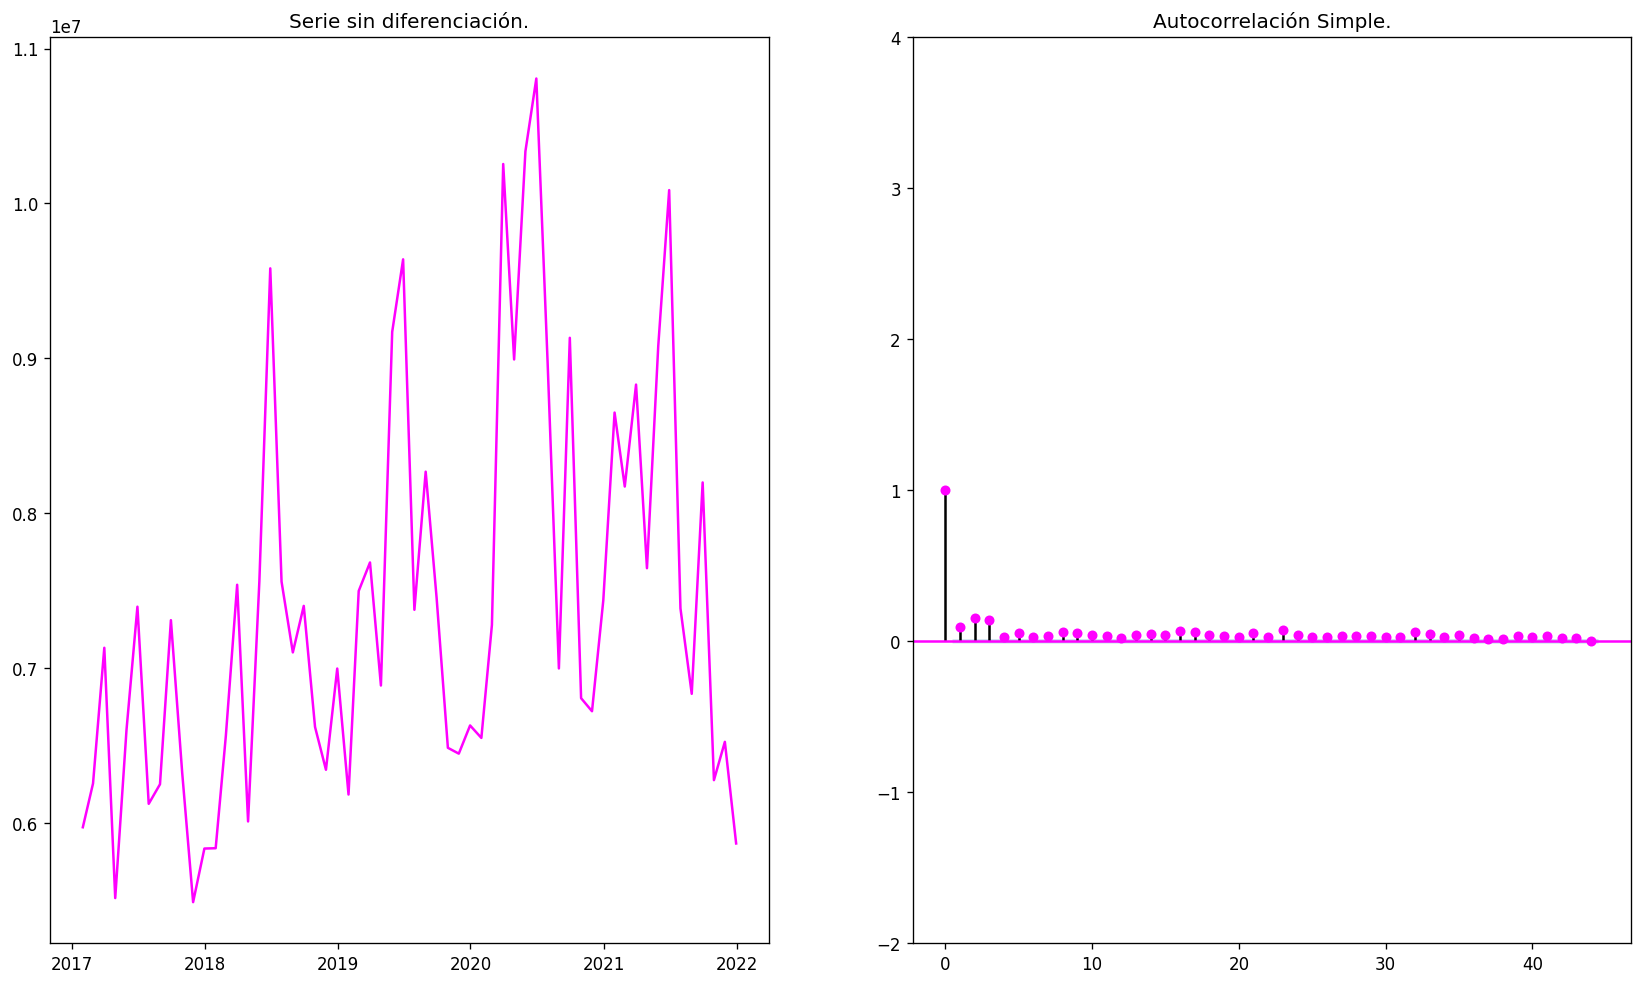

In [ ]:
#ACF plot sin ninguna diferenciación en la serie.

monthly_df = pd.DataFrame()
monthly_df['si_kg'] = data['si_kg'].resample('M').sum()

plt.rcParams.update({'figure.figsize': (17,10), 'figure.dpi': 120})

fig, axes = plt.subplots(1, 2, sharex = False)
axes[0].plot(monthly_df.si_kg, color = "fuchsia"); axes[0].set_title('Serie sin diferenciación.')
axes[1].set(ylim = (-2,4))
plot_acf(data.si_kg, ax = axes[1], color = "fuchsia")
plt.title("Autocorrelación Simple.")

plt.show()

En este caso también tenemos más de un valor por encima del intervalo de confianza por lo que nos inclinaremos por el más evidente y usaremos el  termino de MA con *el valor $q=2$.*

# Como construir el modelo ARIMA
Ahora que hemos determinado los valores de p,d y q.

In [ ]:
#0,2,2 ARIMA model
#pdq
model_1 = ARIMA(data.si_kg, order = (7,0,6))
model_fit1 = model_1.fit(disp = 0)
print(model_fit1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  si_kg   No. Observations:                20858
Model:                     ARMA(7, 6)   Log Likelihood             -264137.625
Method:                       css-mle   S.D. of innovations          76469.182
Date:                Sat, 24 Sep 2022   AIC                         528305.250
Time:                        04:59:23   BIC                         528424.432
Sample:                             0   HQIC                        528344.164
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.133e+04   6352.762      3.358      0.001    8878.792    3.38e+04
ar.L1.si_kg     0.8710      0.089      9.764      0.000       0.696       1.046
ar.L2.si_kg     0.3549      0.131      2.713    

# Medición del ruido blanco y prueba de Ljung-Box
Si en la prueba de Ljung-Box el P-valor > 0.05, significa que nuestro modelo se ajusta bien y existe ruido blanco. *Esto es lo que buscamos, un valor de p > 0.05.*

Si el p-value < 0.05 nuestro modelo no se ajusta bien y por lo tanto no existe ruido blanco.

In [ ]:
sm.stats.acorr_ljungbox(model_fit1.resid, lags = [10], return_df = True)

,lb_stat,lb_pvalue
10,8.533329,0.576889


¡Perfecto! Hemos encontrado la combinación de elementos que nos da un modelo que se ajusta bastante bien.


# Medición de errores residuales.

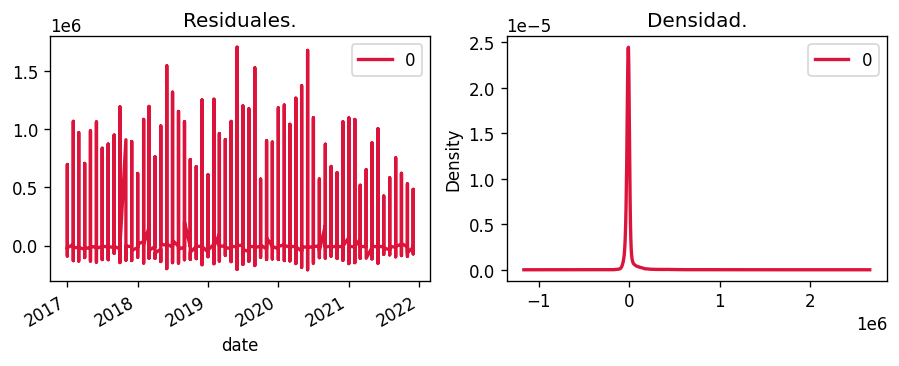

In [ ]:
plt.rcParams.update({'figure.figsize': (9, 3), 'figure.dpi': 120})
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuales.", ax = ax[0], color = 'crimson', lw = 2)
residuals.plot(kind = 'kde', title = 'Densidad.', ax = ax[1], color = "crimson", lw = 2)
plt.show()

# Graficamos los valores reales contra los valores del modelo.

Text(0.5, 1.0, 'Preducciones.')

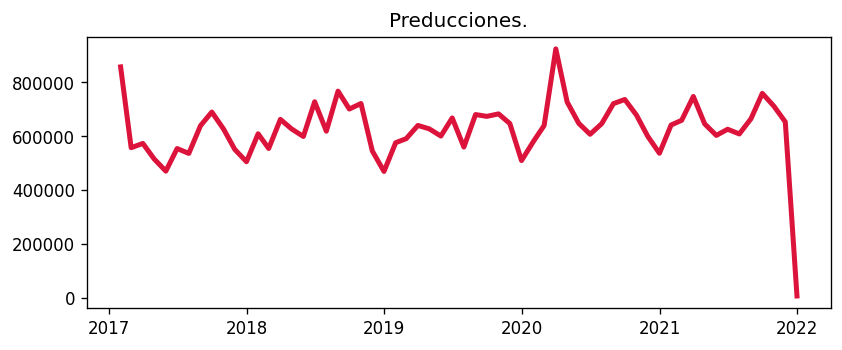

In [ ]:

#plt.rcParams.update({'figure.figsize': (14, 9), 'figure.dpi': 120})
#model_fit1.plot_predict(dynamic = False)
#plt.show()
pred = model_fit1.predict(start = '2017-01-01', end = '2021-12-01', typ= 'levels')
pred = pred.to_frame()
pred.columns = ['si_kg']

monthly_df_pred = pd.DataFrame()
monthly_df_pred['si_kg'] = pred['si_kg'].resample('M').sum()

plt.figure(figsize = (8,3))
plt.plot(monthly_df_pred.index, monthly_df_pred.si_kg, linewidth=3, color = 'crimson')
plt.title("Preducciones.")


Text(0.5, 1.0, 'Valores reales.')

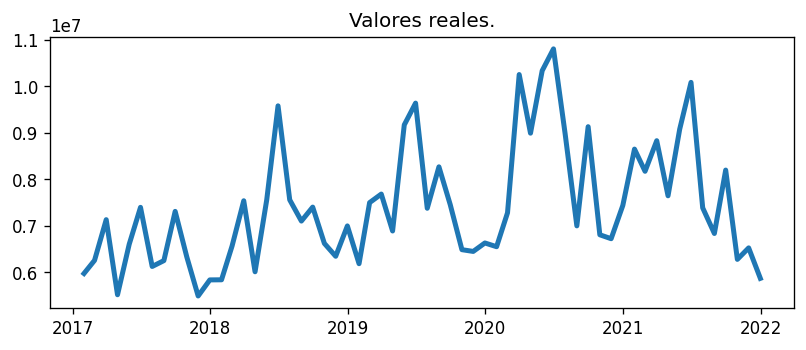

In [ ]:
monthly_df = pd.DataFrame()
monthly_df['si_kg'] = data['si_kg'].resample('M').sum()

#plot monthly kg data
plt.figure(figsize = (8,3))
plt.plot(monthly_df.index, monthly_df.si_kg, linewidth=3)
plt.title("Valores reales.")

#Evaluación de las métricas de precisión:
Dado que visualmente las gráficas no nos dicen mucho, midamos el desempeño del modelo con las métricas más importantes.

In [ ]:
def timeseries_evaluation_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) *100
  print("Resultado de evaluación de las Metrica:-")
  print(f'MSE es: {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE es: {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE es: {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAPE es: {metrics.mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2 es: {metrics.r2_score(y_true, y_pred)}')

In [ ]:
timeseries_evaluation_func(fc, test)

Resultado de evaluación de las Metrica:-
MSE es: 1421964584.1290138
MAE es: 20503.45604033205
RMSE es: 1421964584.1290138
MAPE es: 1.2828754468580637
R2 es: -4393.325871684939


# Predictions:

In [ ]:
model3 = ARIMA(data.si_kg, order = (7,0,6))
model3 = model3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [ ]:
index_future_dates = pd.date_range(start = '2022-01-01', end = '2022-06-30')
pred = model3.predict( start = len(data), end = len(data) + 180).rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2022-01-01     9228.045692
2022-01-02     9150.928064
2022-01-03    10031.229965
2022-01-04    11006.881860
2022-01-05    11172.617455
                  ...     
2022-06-26    12239.472887
2022-06-27    12246.591704
2022-06-28    12252.985826
2022-06-29    12258.243605
2022-06-30    12263.149324
Freq: D, Name: ARIMA Predictions, Length: 181, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5, 1.0, 'Preducciones.')

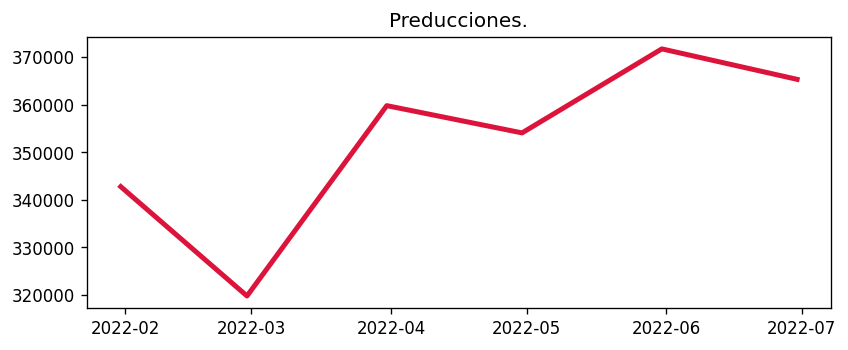

In [ ]:
pred = pred.to_frame()
pred.columns = ['si_kg']

monthly_df_pred = pd.DataFrame()
monthly_df_pred['si_kg'] = pred['si_kg'].resample('M').sum()

plt.figure(figsize = (8,3))
plt.plot(monthly_df_pred.index, monthly_df_pred.si_kg, linewidth=3, color = 'crimson')
plt.title("Preducciones.")

#plt.figure(figsize = (12,5))
#pred.plot(legend = True)
#plt.show()

#Forecast
Finalmente exportamos nuestras predicciones en un archivo .csv

In [ ]:
pred.to_csv("forecast_per_date.csv")